# 🧢 Predicting MLB Home Runs Using Statcast Data

This project explores whether we can predict if a batted ball will become a home run based on its characteristics (launch angle, exit velocity, etc.). We will use real MLB data from Baseball Savant and apply machine learning to classify outcomes.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('../data/savant_data.csv')

print(f"Data Shape: {df.shape}")

df.head()
df.tail()

Data Shape: (494, 70)


,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,pitcher_run_exp,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb,bb_percent,api_break_z_with_gravity,api_break_z_induced,api_break_x_arm,api_break_x_batter_in,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,release_pos_z,release_pos_x,plate_x,plate_z,obp,barrels_total,batter_run_value_per_100,xobp,xslg,pitcher_run_value_per_100,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle
489,7,678894,"Peguero, Liover",7,100,0.333,0.0,0.333,0.333,0.298,0.285,0.313,1,3,102.0,-14.7,2036,92.7,93.21,0,4,3,0.5,6.53,113,153,106,148,309,325,293,0.180,-0.180,71.6,7.0,3,3,1,0,0,0,0,0.0,0,0.0,1.58286,1.06571,0.57714,-0.57714,98.5,71.0,100.0,0.0,0.0,6.39,0.32,-0.46,1.92,0.333,0,-2.571429,0.313,0.339,2.571429,0.020,0.020,-0.006,0.013,0.0,NaN
490,5,607067,"Rea, Colin",5,100,0.000,0.0,NaN,0.000,0.000,0.000,NaN,0,1,NaN,NaN,1928,80.9,79.00,0,3,2,-1.9,5.14,116,152,124,149,307,333,299,0.457,-0.457,60.0,6.6,1,0,0,0,0,0,1,100.0,0,0.0,2.66400,0.88600,1.07800,1.07800,88.0,129.0,NaN,NaN,0.0,5.83,-1.01,0.15,2.95,0.000,0,-9.140000,NaN,NaN,9.140000,NaN,NaN,NaN,0.000,0.0,28.2
491,5,680118,"Blanco, Dairon",5,100,0.000,0.0,0.000,0.000,0.000,0.093,0.100,0,1,72.9,-6.0,1628,80.1,81.60,2,3,2,1.5,7.22,107,155,110,149,310,312,298,-0.484,0.484,71.5,8.1,1,1,0,0,0,0,0,0.0,0,0.0,2.58200,1.00800,1.00200,-1.00200,88.0,13.0,0.0,0.0,0.0,5.92,0.26,-0.05,3.18,0.000,0,9.680000,0.100,0.115,-9.680000,-0.100,-0.100,-0.115,-0.093,66.7,53.6
492,5,694359,"Kavadas, Niko",5,100,0.000,0.0,0.000,0.000,0.000,0.025,0.017,0,1,84.9,47.0,1954,94.5,93.70,0,2,3,-0.8,6.20,118,147,124,153,304,332,310,0.263,-0.263,70.2,7.2,1,1,0,0,0,0,0,0.0,0,0.0,2.15600,0.43600,1.42600,-1.42600,88.0,228.0,0.0,0.0,0.0,5.63,-2.80,0.34,2.64,0.000,0,-5.260000,0.017,0.037,5.260000,-0.017,-0.017,-0.037,-0.025,0.0,33.5
493,4,669194,"Nelson, Ryne",4,100,1.000,0.0,1.000,1.000,0.895,0.158,0.143,1,1,89.8,-17.0,2326,89.6,90.00,0,1,3,0.4,6.63,88,122,81,138,294,310,269,-0.538,0.538,75.8,7.1,1,1,1,0,0,0,0,0.0,0,0.0,1.65000,1.20500,0.61250,0.61250,89.8,10.0,0.0,0.0,0.0,5.64,-0.32,0.64,2.61,1.000,0,13.450000,0.143,0.194,-13.450000,0.857,0.857,0.806,0.737,0.0,48.0


## Data Cleaning + Processing

In [5]:
columns_to_drop = ['pitches', 'total_pitches', 'pitch_percent',
                   'spin_rate', 'velocity', 'effective_speed', 'whiffs', 'swings', 'takes',
                   'eff_min_vel', 'release_extension', 'pos3_int_start_distance', 
                   'pos4_int_start_distance', 'pos5_int_start_distance', 'pos6_int_start_distance',
                   'pos7_int_start_distance', 'pos8_int_start_distance', 'pos9_int_start_distance',
                   'api_break_z_with_gravity', 'api_break_z_induced', 'api_break_x_arm',
                   'api_break_x_batter_in', 'release_pos_z', 'release_pos_x', 'plate_x', 
                   'plate_z', 'pitcher_run_exp', 'pitcher_run_value_per_100']

df = df.drop(columns=columns_to_drop)

# Checking for Null Values 
df.isnull().sum().sort_values(ascending=False)

# Creating Binary Target Columns to Check Homeruns
df['is_hr'] = df['hrs'].apply(lambda x: 1 if x > 0 else 0)


In [6]:
# Checking for Null Values 
df.isnull().sum().sort_values(ascending=False)

# After Checking we Have Arm Angle and BABIP having 5 null values, 
# anything with under 5 missing values will result in the mean being applied 

arm_angle                   5
babip                       5
launch_speed                4
xslgdiff                    4
xba                         4
xbadiff                     4
xslg                        4
hardhit_percent             4
launch_angle                4
barrels_per_bbe_percent     4
xobpdiff                    3
xobp                        3
hyper_speed                 1
bbdist                      1
obp                         0
barrels_per_pa_percent      0
player_id                   0
barrels_total               0
batter_run_value_per_100    0
bb                          0
wobadiff                    0
swing_miss_percent          0
bb_percent                  0
hrs                         0
k_percent                   0
run_exp                     0
ba                          0
iso                         0
slg                         0
woba                        0
xwoba                       0
hits                        0
abs                         0
bat_speed 

In [7]:
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum().sum()  

np.int64(0)

In [8]:
# Creating Binary Target Columns to Check Homeruns
df['is_hr'] = df['hrs'].apply(lambda x: 1 if x > 0 else 0)

## 📖 Data Dictionary

- `player_id` - Each player’s unique ID  
- `player_name` - Player's first and last name  
- `ba` - Batting Average (hits / at-bats)  
- `iso` - Isolated Power (SLG - BA), measuring raw power from the batter  
- `babip` - Batting Average on Balls In Play  
- `slg` - Slugging Percentage (total bases / at-bats)  
- `woba` - Weighted On-Base Average (overall offensive value)  
- `xwoba` - Expected Weighted On-Base Average based on quality of contact  
- `xba` - Expected Batting Average based on launch metrics  
- `hits` - Total number of hits  
- `abs` - Total number of at-bats  
- `launch_speed` - Average exit velocity of batted balls (mph)  
- `launch_angle` - Average vertical launch angle (degrees)  
- `run_exp` - Expected runs created from contact quality  
- `bat_speed` - Speed of the bat at the moment of contact (mph)  
- `swing_length` - Length of the batter’s swing (inches)  
- `pa` - Total plate appearances  
- `bip` - Balls put in play  
- `singles` - Number of singles hit  
- `doubles` - Number of doubles hit  
- `triples` - Number of triples hit  
- `hrs` - Number of home runs hit  
- `so` - Total strikeouts  
- `k_percent` - Strikeout percentage  
- `bb` - Total walks (base on balls)  
- `bb_percent` - Walk percentage  
- `hyper_speed` - Player’s sprint speed during batted ball events  
- `bbdist` - Average distance (feet) of batted balls  
- `hardhit_percent` - % of batted balls hit at 95+ mph  
- `barrels_per_bbe_percent` - % of barreled balls per batted ball event  
- `barrels_per_pa_percent` - % of barreled balls per plate appearance  
- `obp` - On-base percentage (times on base / plate appearances)  
- `barrels_total` - Total number of barrels hit  
- `batter_run_value_per_100` - Run value added per 100 pitches seen  
- `xobp` - Expected on-base percentage  
- `xslg` - Expected slugging percentage  
- `xbadiff` - Difference between actual and expected batting average  
- `xobpdiff` - Difference between actual and expected on-base percentage  
- `xslgdiff` - Difference between actual and expected slugging percentage  
- `wobadiff` - Difference between actual and expected wOBA  
- `swing_miss_percent` - Percentage of swings that missed  
- `arm_angle` - Arm angle at point of contact  
- `is_hr` - **Target variable**: 1 = player hit at least one home run, 0 = no home runs  


In [9]:
FEATURES = df.columns.tolist()

FEATURES

['player_id',
 'player_name',
 'ba',
 'iso',
 'babip',
 'slg',
 'woba',
 'xwoba',
 'xba',
 'hits',
 'abs',
 'launch_speed',
 'launch_angle',
 'run_exp',
 'bat_speed',
 'swing_length',
 'pa',
 'bip',
 'singles',
 'doubles',
 'triples',
 'hrs',
 'so',
 'k_percent',
 'bb',
 'bb_percent',
 'hyper_speed',
 'bbdist',
 'hardhit_percent',
 'barrels_per_bbe_percent',
 'barrels_per_pa_percent',
 'obp',
 'barrels_total',
 'batter_run_value_per_100',
 'xobp',
 'xslg',
 'xbadiff',
 'xobpdiff',
 'xslgdiff',
 'wobadiff',
 'swing_miss_percent',
 'arm_angle',
 'is_hr']

In [10]:
REFPATH = "baseball_metrics_simplified_reference.csv"

DESCRIPTORS = [
    "Unique identifier for each player",
    "Full name of the player",
    "Batting average (hits divided by at-bats)",
    "Isolated power (slugging minus batting average, measures raw power)",
    "Batting average on balls in play",
    "Slugging percentage (total bases per at-bat)",
    "Weighted on-base average (measures overall offensive performance)",
    "Expected weighted on-base average based on contact quality",
    "Expected batting average based on launch angle and exit velocity",
    "Total number of hits",
    "Total number of at-bats",
    "Average exit velocity of batted balls (in mph)",
    "Average launch angle of batted balls (in degrees)",
    "Expected runs generated from batted ball events",
    "Average speed of the bat at contact (in mph)",
    "Swing length (in inches)",
    "Total number of plate appearances",
    "Number of balls put in play",
    "Number of singles hit",
    "Number of doubles hit",
    "Number of triples hit",
    "Number of home runs hit",
    "Total strikeouts",
    "Strikeout percentage",
    "Total walks (base on balls)",
    "Walk percentage",
    "Player's sprint speed during batted ball events",
    "Average distance of batted balls (in feet)",
    "Percentage of batted balls hit at 95+ mph",
    "Percentage of barrels per batted ball event",
    "Percentage of barrels per plate appearance",
    "On-base percentage (reaching base per plate appearance)",
    "Total number of barrels hit",
    "Run value generated per 100 pitches",
    "Expected on-base percentage",
    "Expected slugging percentage",
    "Difference between actual and expected batting average",
    "Difference between actual and expected on-base percentage",
    "Difference between actual and expected slugging percentage",
    "Difference between actual and expected wOBA",
    "Percentage of swings that resulted in misses",
    "Arm angle of the batter at contact",
    "Target: 1 if the player hit at least one home run, otherwise 0"
]

    

In [11]:
# @title
def operate_data_dictionary(features, descriptors, method="set", refpath=None):
  """ Operational function to work in creating or getting data dictionary. """
  if method == "set":
    # Produce dictionary-wrapped key-value associations of feature summaries
    data_dictionary = dict(zip(FEATURES, DESCRIPTORS))
    # Convert data dictionary to cleaner reference table
    reference = pd.DataFrame(data_dictionary, index=[0])
    # Save reference table for future access
    if refpath is not None and type(refpath) == str:
      reference.to_csv(refpath, index=False)
  if method == "get":
    # Get reference table from saved data dictionary
    if refpath is not None and type(refpath) == str:
      return pd.read_csv(refpath)
    else:
      raise TypeError("Saved file for data dictionary not found.")

def encode_categorical_feature(df, feature, encoding="label"):
  """ Custom function to encode categorical features using label-schema. """
  # Instantiate encoder architecture
  if encoding == "label":
    encoder = LabelEncoder()
  # Transform dataset feature using labeling schema (performs in-place)
  df[feature] = encoder.fit_transform(df[feature])
  # Get fitted encoder (just in case)
  return encoder

In [12]:
# Set data dictionary as reference table
operate_data_dictionary(features=FEATURES,
                        descriptors=DESCRIPTORS,
                        method="set",
                        refpath=REFPATH)

In [13]:
reference = operate_data_dictionary(features=FEATURES,
                                    descriptors=DESCRIPTORS,
                                    method="get",
                                    refpath=REFPATH)

In [14]:
reference.T

,0
player_id,Unique identifier for each player
player_name,Full name of the player
ba,Batting average (hits divided by at-bats)
iso,Isolated power (slugging minus batting average...
babip,Batting average on balls in play
slg,Slugging percentage (total bases per at-bat)
woba,Weighted on-base average (measures overall off...
xwoba,Expected weighted on-base average based on con...
xba,Expected batting average based on launch angle...
hits,Total number of hits


# Exploratory Data Analysis


In [15]:
dataset_hr = df.sort_values('hrs', ascending= False).head(10)

dataset_hr.head()

,player_id,player_name,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb,bb_percent,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,obp,barrels_total,batter_run_value_per_100,xobp,xslg,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle,is_hr
17,663728,"Raleigh, Cal",0.246,0.331,0.256,0.577,0.401,0.400,0.253,32,130,91.8,21.0,11.328,72.4,7.7,152,90,13,7,0,12,40,26.3,20,13.2,93.6,183.0,47.777778,22.222222,13.157895,0.355,20,1.759006,0.361,0.582,-0.007,-0.006,-0.005,0.001,29.9,38.4,1
11,656941,"Schwarber, Kyle",0.258,0.331,0.253,0.589,0.428,0.434,0.270,32,124,94.2,17.6,16.887,73.9,7.5,154,91,16,3,1,12,33,21.4,26,16.9,94.7,172.0,60.439560,15.384615,9.090909,0.403,14,2.531784,0.413,0.614,-0.012,-0.010,-0.025,-0.006,29.6,38.8,1
36,592450,"Judge, Aaron",0.414,0.346,0.484,0.759,0.531,0.498,0.351,55,133,95.6,15.9,23.861,74.4,8.1,153,102,33,9,2,11,31,20.3,18,11.8,95.1,183.0,56.862745,23.529412,15.686275,0.490,24,3.950497,0.436,0.762,0.063,0.054,-0.003,0.033,28.9,38.7,1
1,695578,"Wood, James",0.271,0.279,0.322,0.550,0.403,0.395,0.256,38,140,92.9,2.9,8.504,73.1,7.5,164,97,19,9,0,10,43,26.2,23,14.0,93.6,143.0,54.639175,17.525773,10.365854,0.378,17,1.160164,0.366,0.563,0.015,0.012,-0.013,0.008,27.8,35.8,1
33,553993,"Suárez, Eugenio",0.202,0.271,0.198,0.473,0.328,0.364,0.231,26,129,92.9,23.8,2.429,70.2,7.8,145,91,11,5,0,10,39,26.9,12,8.3,93.2,174.0,57.142857,16.483516,10.344828,0.283,15,0.398851,0.314,0.530,-0.029,-0.031,-0.057,-0.036,30.8,37.5,1


## How do key launch metrics (launch_speed, launch_angle, bbdist) differ between HR and non-HR groups? 

In [16]:
homerun_group = df.groupby('is_hr')[['launch_speed', 'launch_angle','bbdist']].mean()

print(homerun_group)

       launch_speed  launch_angle      bbdist
is_hr                                        
0         85.493870      9.920423  141.128365
1         89.137538     13.708923  157.187692


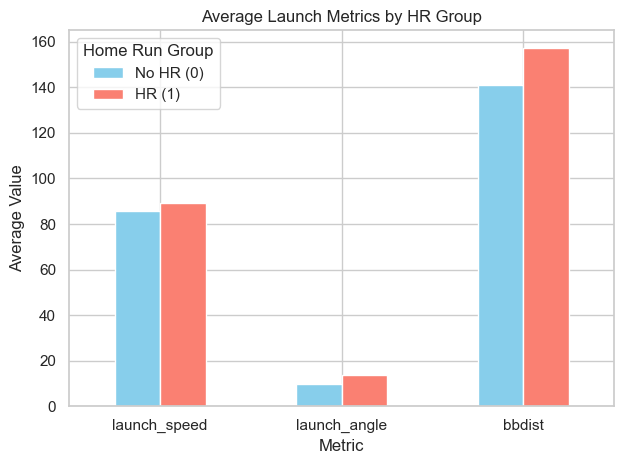

In [23]:
# Transpose the DataFrame so metrics are on X-axis
homerun_group.T.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Average Launch Metrics by HR Group')
plt.ylabel('Average Value')
plt.xlabel('Metric')
plt.legend(title='Home Run Group', labels=['No HR (0)', 'HR (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## - Summarized Metrics 

### The chart shows a clear difference in homerun metrics. With homerun hitters have a 
### - higher launch speed (~89 mph vs. ~85 mph), 
### - higher launch angle (~13.7° vs. ~9.9°), 
### - greater batted ball distance (~157 ft vs. ~141 ft).

### The differences can be strong predicttors of home run likeihood and should be considered key features in the machine learning model.

## What features are most correlated with homeruns? 

In [32]:
swing_features = [
    'launch_speed',         
    'launch_angle',           
    'bat_speed',              
    'swing_length',          
    'bbdist',                
    'hardhit_percent',        
    'barrels_per_bbe_percent',
    'barrels_per_pa_percent', 
    'barrels_total',         
    'swing_miss_percent',     
    'arm_angle',
    'slg',
    'ba',
    'iso',
    
]
df[swing_features + ['is_hr']].corr()['is_hr'].drop('is_hr').sort_values()



swing_miss_percent         0.001989
arm_angle                  0.064087
launch_angle               0.189162
swing_length               0.194386
ba                         0.257607
bat_speed                  0.292434
bbdist                     0.317198
launch_speed               0.358529
hardhit_percent            0.372456
barrels_per_bbe_percent    0.477975
slg                        0.536408
barrels_per_pa_percent     0.559425
barrels_total              0.603355
iso                        0.607084
Name: is_hr, dtype: float64